In [1]:
import pickle
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [4]:
latest_pkl = '../mitigation/weblog_stats/allc7_stats.20220930.pkl'
print('Loading latest pickle: '+latest_pkl)
results=pickle.load(
        open(
            latest_pkl,
            'rb'
            )
        )
rpd = pd.DataFrame(results).transpose()
print('Results stored in pandas DataFrame name "rpd"')


Loading latest pickle: ../mitigation/weblog_stats/allc7_stats.20220930.pkl
Results stored in pandas DataFrame name "rpd"


In [5]:
pd.set_option('display.max_rows',1000)

In [6]:
rpd.columns

Index(['project', 'plversion', 'procedure', 'nant', 'totaltime', 'imgtime',
       'cubetime', 'aggtime', 'fctime', 'nEB', 'npt', 'nscan', 'reptgt',
       'nscience', 'nspw', 'webpredrms', 'webcontrms', 'webcontBW', 'webfreq',
       'webbm', 'webdirtyDR', 'webDRcorr', 'webcontpk', 'webfreqline',
       'webbmline', 'webpredrmsline', 'webdirtyDRline', 'webDRcorrline',
       'weblinerms', 'weblinepk', 'weblineBW', 'allowedcubesize',
       'allowedcubelimit', 'predcubesize', 'mitigatedcubesize',
       'allowedprodsize', 'initialprodsize', 'prodsizeaftercube',
       'mitigatedprodsize', 'mitigated', 'mit_nbins', 'mit_hm_imsize',
       'mit_hm_cell', 'mit_field', 'mit_spw'],
      dtype='object')

In [7]:
len(rpd)

2565

(array([ 762.,  131.,    0.,    0.,    0.,    2.,   42.,  373., 1122.,
         133.]),
 array([6.0, 10.6, 15.2, 19.799999999999997, 24.4, 29.0,
        33.599999999999994, 38.199999999999996, 42.8, 47.4, 52.0],
       dtype=object),
 <BarContainer object of 10 artists>)

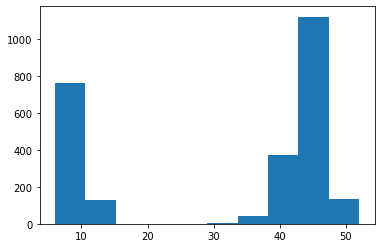

In [6]:
plt.hist(rpd['nant'])

In [7]:
# number of 12m mouses
len(rpd[rpd['nant'] > 18])

1672

In [8]:
# number of 7m mouses
len(rpd[rpd['nant'] <=18])

893

In [9]:
# total number of mouses
1672+893

2565

Matches the total length of the array

In [10]:
# total number of mitigated projects
len(rpd[(rpd['mitigated'] == True) ] )

397

In [11]:
idx_mit = (rpd['mitigated'] == True) & ((rpd['mit_spw'] != 'default') | (rpd['mit_field'] != 'default') | (rpd['mit_hm_cell'] != 'default') | (rpd['mit_hm_imsize'] != 'default') | (rpd['mit_nbins'] != 'default'))

In [12]:
len(rpd[idx_mit])

325

In [13]:
# total number of 12m mitigated projects
len(rpd[idx_mit][rpd[idx_mit]['nant'] > 18])

325

In [14]:
# total number of 7m mitigated mouses
len(rpd[idx_mit][rpd[idx_mit]['nant'] < 18])

0

In [15]:
# what are the proeprties of the 7m mouses
idx = (rpd['mitigated'] == True) &  (rpd['nant'] < 18)
rpd[idx]['mit_spw']

uid___A001_X1465_X2774    default
uid___A001_X1465_X3720    default
uid___A001_X1465_X6da     default
uid___A001_X1465_Xb       default
uid___A001_X1465_Xf00     default
uid___A001_X1467_X1e0     default
uid___A001_X1467_X1e7     default
uid___A001_X1467_X1ee     default
uid___A001_X1467_X1fc     default
uid___A001_X1467_X226     default
uid___A001_X1467_X22d     default
uid___A001_X1467_X234     default
uid___A001_X1469_Xb1      default
uid___A001_X146c_Xc5      default
uid___A001_X146c_Xcc      default
uid___A001_X146c_Xd3      default
uid___A001_X146c_Xe1      default
uid___A001_X146c_Xe8      default
uid___A001_X146c_Xfd      default
uid___A001_X146d_X35      default
uid___A001_X14c3_X10ed    default
uid___A001_X14c3_Xa5e     default
uid___A001_X14c3_Xa76     default
uid___A001_X14c3_Xa83     default
uid___A001_X14d7_X69      default
Name: mit_spw, dtype: object

Looking at the above, they just trigger a warning for too much time time, but doesn't actually mitigate anything. So I'm going to remove those 25 projects from the total number of mitigated projects

In [16]:
# look at how many mous trigger product size mitigation only 
idx = (rpd['mitigated'] == True) & (rpd['predcubesize'] == rpd['mitigatedcubesize']) & (rpd['initialprodsize'] > rpd['mitigatedprodsize']) & (rpd['nant'] > 18)
print(len(rpd[idx]))
rpd[idx][['predcubesize','mitigatedcubesize','initialprodsize','prodsizeaftercube','mitigatedprodsize','mit_field','mit_spw','mit_nbins','mit_hm_imsize','mit_hm_cell']]

73


,predcubesize,mitigatedcubesize,initialprodsize,prodsizeaftercube,mitigatedprodsize,mit_field,mit_spw,mit_nbins,mit_hm_imsize,mit_hm_cell
uid___A001_X1465_X11a8,32.7,32.7,261.0,65.4,65.4,default,25,default,default,default
uid___A001_X1465_X120b,38.9,38.9,311.0,77.8,77.8,default,25,default,default,default
uid___A001_X1465_X122e,39.2,39.2,316.0,79.0,79.0,default,17,default,default,default
uid___A001_X1465_X143,2.15,2.15,571.0,346.0,346.0,"Oph_06,Oph_26,Oph_19,Oph_31,Oph_18,Oph_28,Oph_...",default,default,default,default
uid___A001_X1465_X1434,34.4,34.4,277.0,69.3,69.3,default,9,default,default,default
uid___A001_X1465_X143c,39.8,39.8,321.0,80.3,80.3,default,9,default,default,default
uid___A001_X1465_X144c,34.4,34.4,277.0,69.3,69.3,default,9,default,default,default
uid___A001_X1465_X1454,39.8,39.8,321.0,80.3,80.3,default,9,default,default,default
uid___A001_X1465_X145c,39.8,39.8,321.0,80.3,80.3,default,9,default,default,default
uid___A001_X1465_X1460,34.4,34.4,277.0,69.3,69.3,default,9,default,default,default


In [17]:
# cubes migiated, but have all fields and spws
idx = (rpd['mitigated'] == True) & (rpd['predcubesize'] > rpd['mitigatedcubesize']) & (rpd['mit_field'] =='default') & (rpd['mit_spw'] == 'default') & (rpd['nant'] > 18)
print(len(rpd[idx]))
rpd[idx][['predcubesize','mitigatedcubesize','initialprodsize','prodsizeaftercube','mitigatedprodsize','mit_field','mit_spw','mit_nbins','mit_hm_imsize','mit_hm_cell']]

77


,predcubesize,mitigatedcubesize,initialprodsize,prodsizeaftercube,mitigatedprodsize,mit_field,mit_spw,mit_nbins,mit_hm_imsize,mit_hm_cell
uid___A001_X1465_X14f9,448.0,17.3,1850.0,73.8,73.8,default,default,"19:1,25:2,27:2,23:1",0.7pb,3ppb
uid___A001_X1465_X159c,65.3,37.3,236.0,135.0,135.0,default,default,default,0.4pb,default
uid___A001_X1465_X15a2,40.8,36.7,147.0,133.0,133.0,default,default,default,0.23pb,default
uid___A001_X1465_X16fa,43.4,21.7,179.0,92.6,92.6,default,default,"25:2,21:1,27:2,19:1",default,default
uid___A001_X1465_X1abe,700.0,28.3,4900.0,227.0,227.0,default,default,"25:2,37:2,27:1,33:1,29:1,35:2,31:1",0.7pb,3ppb
uid___A001_X1465_X1ac6,645.0,23.5,4520.0,188.0,188.0,default,default,"29:1,27:1,37:2,33:1,25:2,35:2,31:1",0.7pb,3ppb
uid___A001_X1465_X1ace,482.0,20.2,3370.0,161.0,161.0,default,default,"25:2,29:1,35:2,37:2,33:1,27:1,31:1",0.7pb,3ppb
uid___A001_X1465_X1ad2,2320.0,99.5,18600.0,797.0,797.0,default,default,"23:2,25:2,21:2,27:2",0.7pb,3ppb
uid___A001_X1465_X1ad6,723.0,28.3,5060.0,227.0,227.0,default,default,"33:1,29:1,37:2,25:2,35:2,31:1,27:1",0.7pb,3ppb
uid___A001_X1465_X1b10,700.0,24.9,3500.0,199.0,199.0,default,default,"27:2,23:1,25:1,29:1",0.7pb,3ppb


In [18]:
# cubes mitigated and number of spws and number of fields
idx = (rpd['mitigated'] == True) & (rpd['predcubesize'] > rpd['mitigatedcubesize']) & (rpd['mit_field'] !='default') & (rpd['mit_spw'] != 'default') & (rpd['nant'] > 18)
print(len(rpd[idx]))
rpd[idx][['predcubesize','mitigatedcubesize','initialprodsize','prodsizeaftercube','mitigatedprodsize','mit_field','mit_spw','mit_nbins','mit_hm_imsize','mit_hm_cell']]

13


,predcubesize,mitigatedcubesize,initialprodsize,prodsizeaftercube,mitigatedprodsize,mit_field,mit_spw,mit_nbins,mit_hm_imsize,mit_hm_cell
uid___A001_X1465_X2047,492.0,38.9,15700.0,234.0,234.0,Cl_star_NGC6618_B268,"25,27,29,31,35,37",default,0.7pb,3ppb
uid___A001_X1465_X2f66,53.8,38.5,861.0,154.0,154.0,HOPS_56,"25,29,31",default,0.32pb,default
uid___A001_X1465_X2f6b,69.1,38.9,1660.0,156.0,156.0,HOPS_140,"25,29,31",default,0.42pb,default
uid___A001_X1465_X2ff4,35.8,31.2,10600.0,125.0,125.0,serps11,"25,27,31",default,default,default
uid___A001_X1467_X1dc,34.6,31.9,16600.0,63.7,63.7,"""126991""",25,default,default,default
uid___A001_X1467_X1ea,31.9,30.1,14300.0,60.2,60.2,"""776981""",25,default,default,default
uid___A001_X1467_X1ff,34.6,31.9,830.0,63.7,63.7,"""519029""",25,default,default,default
uid___A001_X1467_X206,31.9,30.1,2040.0,60.2,60.2,"""545969""",25,default,default,default
uid___A001_X1467_X20d,62.4,31.2,999.0,62.5,62.5,"""561782""",25,"31:2,25:2,27:2,29:2",default,default
uid___A001_X146c_X259,354.0,38.9,5660.0,156.0,156.0,IRAS04166+2706,"25,27,29,31,37","29:2,37:2,27:2,35:2,31:2,25:2,33:2",0.7pb,default


In [19]:
# cube mitigated and number of fields, but not spws
idx = (rpd['mitigated'] == True) & (rpd['predcubesize'] > rpd['mitigatedcubesize']) & (rpd['mit_field'] !='default') & (rpd['mit_spw'] == 'default') & (rpd['nant'] > 18)
print(len(rpd[idx]))
rpd[idx][['predcubesize','mitigatedcubesize','initialprodsize','prodsizeaftercube','mitigatedprodsize','mit_field','mit_spw','mit_nbins','mit_hm_imsize','mit_hm_cell']]

12


,predcubesize,mitigatedcubesize,initialprodsize,prodsizeaftercube,mitigatedprodsize,mit_field,mit_spw,mit_nbins,mit_hm_imsize,mit_hm_cell
uid___A001_X1465_X3596,43.4,21.7,2430.0,347.0,347.0,"""G10.34-0.14"",""G11.92-0.61""",default,"29:2,27:2,25:2,31:2",default,default
uid___A001_X1465_X359d,8.64,7.96,277.0,127.0,127.0,"""G35.03+0.35"",""G34.30+0.20""",default,default,default,default
uid___A001_X1465_X3662,12.6,11.1,3030.0,425.0,425.0,"J18302857-0211253,J18303080-0214214,J18303111-...",default,default,default,default
uid___A001_X1467_X1e3,30.1,27.7,27200.0,222.0,222.0,"""100132""",default,default,default,default
uid___A001_X1467_X1e5,3.08,2.71,2790.0,304.0,304.0,"""100132"",""123833"",""118234"",""115972"",""109588"",""...",default,default,default,default
uid___A001_X1467_X1f1,30.1,27.7,4820.0,222.0,222.0,"""859783""",default,default,default,default
uid___A001_X1467_X1f8,31.9,27.7,9180.0,222.0,222.0,"""818184""",default,default,default,default
uid___A001_X1467_X21b,49.3,24.7,2370.0,197.0,197.0,"""604868""",default,"29:2,25:2,31:2,27:2",default,default
uid___A001_X1467_X222,43.4,19.7,11800.0,315.0,315.0,"""633013"",""638718""",default,"29:2,25:2,27:2,31:2",default,default
uid___A001_X1467_X229,24.0,22.1,6340.0,177.0,177.0,"""724566""",default,default,default,default


In [20]:
# cube and spw mitigated, but not fields
idx = (rpd['mitigated'] == True) & (rpd['predcubesize'] > rpd['mitigatedcubesize']) & (rpd['mit_field'] =='default') & (rpd['mit_spw'] != 'default') & (rpd['nant'] > 18)
print(len(rpd[idx]))
rpd[idx][['predcubesize','mitigatedcubesize','initialprodsize','prodsizeaftercube','mitigatedprodsize','mit_field','mit_spw','mit_nbins','mit_hm_imsize','mit_hm_cell']]

150


,predcubesize,mitigatedcubesize,initialprodsize,prodsizeaftercube,mitigatedprodsize,mit_field,mit_spw,mit_nbins,mit_hm_imsize,mit_hm_cell
uid___A001_X1465_X1207,363.0,39.5,1810.0,79.1,79.1,default,31,"27:1,31:2,29:1,25:1",0.7pb,default
uid___A001_X1465_X121e,805.0,69.1,6450.0,415.0,415.0,default,"25,27,29,31,33",default,0.7pb,3ppb
uid___A001_X1465_X137b,145.0,39.3,1160.0,78.7,78.7,default,23,default,0.66pb,default
uid___A001_X1465_X137f,106.0,37.8,848.0,75.6,75.6,default,23,default,0.56pb,default
uid___A001_X1465_X1383,96.0,37.8,769.0,75.6,75.6,default,23,default,0.53pb,default
uid___A001_X1465_X1444,48.4,38.2,390.0,77.0,77.0,default,9,default,0.29pb,default
uid___A001_X1465_X1450,48.4,38.2,390.0,77.0,77.0,default,9,default,0.29pb,default
uid___A001_X1465_X1458,48.4,38.2,390.0,77.0,77.0,default,9,default,0.29pb,default
uid___A001_X1465_X1468,67.9,38.2,548.0,77.0,77.0,default,9,default,0.41pb,default
uid___A001_X1465_X16f8,983.0,40.8,4070.0,92.5,92.5,default,"19,21,27","27:2,19:1,25:2,21:1",0.7pb,3ppb


In [ ]:
# how many had mitigation limits lifted

In [21]:
idx = (rpd['allowedprodsize'] > 500)  | (rpd['allowedcubesize'] > 40) | (rpd['allowedcubelimit'] > 60)
print(len(rpd[idx]))
rpd[idx][['allowedprodsize','allowedcubesize','allowedcubelimit','plversion']]

29


,allowedprodsize,allowedcubesize,allowedcubelimit,plversion
uid___A001_X1465_X121e,500.0,40.0,75.0,2021
uid___A001_X1465_X186d,500.0,40.0,85.0,2021
uid___A001_X1465_X1871,500.0,40.0,75.0,2021
uid___A001_X1465_X1875,500.0,40.0,100.0,2021
uid___A001_X1465_X1aba,1000.0,80.0,120.0,2021
uid___A001_X1465_X1ac2,1000.0,80.0,120.0,2021
uid___A001_X1465_X1aca,1000.0,80.0,120.0,2021
uid___A001_X1465_X1ad2,1000.0,120.0,200.0,2021
uid___A001_X1465_X1ada,700.0,80.0,120.0,2021
uid___A001_X1465_X1ae4,1000.0,80.0,120.0,2021


In [22]:
idx = (rpd['plversion'] == '2021') &(rpd['allowedprodsize'] > 500)  | (rpd['allowedcubesize'] > 40) | (rpd['allowedcubelimit'] > 60)
print(len(rpd[idx]))

29


In [176]:
idx = (rpd['plversion'] != '2021') & (rpd['allowedprodsize'] > 350)  | (rpd['allowedcubesize'] > 40) | (rpd['allowedcubelimit'] > 60)
print(len(rpd[idx]))
rpd[idx][['allowedprodsize','allowedcubesize','allowedcubelimit','plversion']]

29


,allowedprodsize,allowedcubesize,allowedcubelimit,plversion
uid___A001_X1465_X121e,500.0,40.0,75.0,2021
uid___A001_X1465_X186d,500.0,40.0,85.0,2021
uid___A001_X1465_X1871,500.0,40.0,75.0,2021
uid___A001_X1465_X1875,500.0,40.0,100.0,2021
uid___A001_X1465_X1aba,1000.0,80.0,120.0,2021
uid___A001_X1465_X1ac2,1000.0,80.0,120.0,2021
uid___A001_X1465_X1aca,1000.0,80.0,120.0,2021
uid___A001_X1465_X1ad2,1000.0,120.0,200.0,2021
uid___A001_X1465_X1ada,700.0,80.0,120.0,2021
uid___A001_X1465_X1ae4,1000.0,80.0,120.0,2021


In [23]:
idx_12m = rpd['nant'] > 18
np.nansum(rpd[idx_12m]['initialprodsize'])/1024.0 #GB -> TB

947.2041308593771

In [24]:
idx_12m = rpd['nant'] > 18
np.nansum(rpd[idx_12m]['mitigatedprodsize'])/1024.0 #GB -> TB

94.79329101562493

In [25]:
# product size above limit
np.nansum(rpd[idx_12m]['initialprodsize'] > 500)

227

In [26]:
# cube size above limit
np.nansum(rpd[idx_12m]['predcubesize'] > 40)

235

In [27]:
idx = (rpd['nant'] > 18) & (rpd['initialprodsize'] >= 500) & (rpd['predcubesize'] >= 40)
np.nansum(idx)

184

In [28]:
idx = (rpd['nant'] > 18) & (rpd['initialprodsize'] >= 500) & (rpd['predcubesize'] < 40)
np.nansum(idx)

43

In [30]:
idx = (rpd['nant'] > 18) & (rpd['initialprodsize'] < 500) & (rpd['predcubesize'] >= 40)
np.nansum(idx)

51

In [29]:
100*184.0/1672

11.004784688995215

(array([2.209e+03, 3.420e+02, 1.200e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([200.0, 480.0, 760.0, 1040.0, 1320.0, 1600.0, 1880.0, 2160.0,
        2440.0, 2720.0, 3000.0], dtype=object),
 <BarContainer object of 10 artists>)

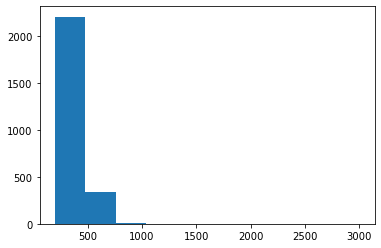

In [31]:
plt.hist(rpd['allowedprodsize'])

In [32]:
np.min(rpd['allowedprodsize'])

200.0

In [33]:
np.unique(rpd['allowedprodsize'])

array([200.0, 300.0, 350.0, 500.0, 600.0, 700.0, 750.0, 1000.0, 1500.0,
       3000.0], dtype=object)

In [34]:
rpd.columns

Index(['project', 'plversion', 'procedure', 'nant', 'totaltime', 'imgtime',
       'cubetime', 'aggtime', 'fctime', 'nEB', 'npt', 'nscan', 'reptgt',
       'nscience', 'nspw', 'webpredrms', 'webcontrms', 'webcontBW', 'webfreq',
       'webbm', 'webdirtyDR', 'webDRcorr', 'webcontpk', 'webfreqline',
       'webbmline', 'webpredrmsline', 'webdirtyDRline', 'webDRcorrline',
       'weblinerms', 'weblinepk', 'weblineBW', 'allowedcubesize',
       'allowedcubelimit', 'predcubesize', 'mitigatedcubesize',
       'allowedprodsize', 'initialprodsize', 'prodsizeaftercube',
       'mitigatedprodsize', 'mitigated', 'mit_nbins', 'mit_hm_imsize',
       'mit_hm_cell', 'mit_field', 'mit_spw'],
      dtype='object')

In [35]:
np.unique(rpd['plversion'])

array(['2020', '2021', 'C7'], dtype=object)

In [36]:
idx = rpd['prodsizeaftercube'] == rpd['mitigatedprodsize']
np.sum(idx)

2565

In [37]:
len(rpd)

2565

### Making some histograms of mitigation vs. unmitigated project properties

In [39]:
idx_mit = (rpd['initialprodsize'] > rpd['mitigatedprodsize']) & (rpd['nant'] > 18)
np.sum(idx_mit)

325

In [38]:
idx_unmit = (rpd['initialprodsize'] == rpd['mitigatedprodsize']) & (rpd['nant'] > 18)
np.sum(idx_unmit)

1347

(array([254.,  21.,  36.,   2.,   7.,   1.,   0.,   0.,   0.,   4.]),
 array([3.0, 4.7, 6.4, 8.1, 9.8, 11.5, 13.2, 14.9, 16.6,
        18.299999999999997, 20.0], dtype=object),
 <BarContainer object of 10 artists>)

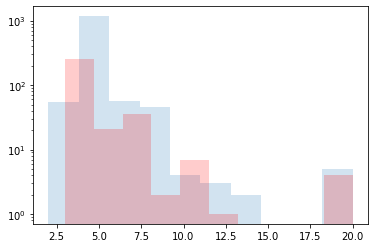

In [40]:
plt.hist(rpd['nspw'][idx_unmit],log=True,alpha=0.2)
plt.hist(rpd['nspw'][idx_mit],color='red',log=True,alpha=0.2)

(array([283.,   8.,  14.,   2.,   6.,   3.,   3.,   1.,   2.,   3.]),
 array([1.0, 13.0, 25.0, 37.0, 49.0, 61.0, 73.0, 85.0, 97.0, 109.0, 121.0],
       dtype=object),
 <BarContainer object of 10 artists>)

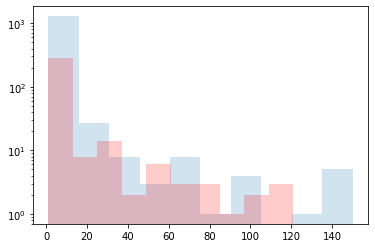

In [41]:
plt.hist(rpd['nscience'][idx_unmit],log=True,alpha=0.2)
plt.hist(rpd['nscience'][idx_mit],color='red',log=True,alpha=0.2)

(array([283.,   7.,  12.,   4.,   7.,   3.,   3.,   1.,   2.,   3.]),
 array([3.0, 51.1, 99.2, 147.3, 195.4, 243.5, 291.6, 339.7, 387.8,
        435.90000000000003, 484.0], dtype=object),
 <BarContainer object of 10 artists>)

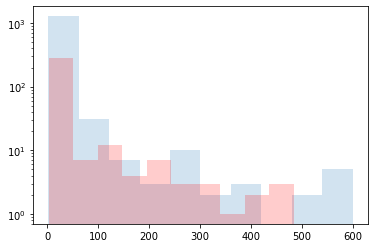

In [42]:
plt.hist(rpd['nscience'][idx_unmit]*rpd['nspw'][idx_unmit],log=True,alpha=0.2)
plt.hist(rpd['nscience'][idx_mit]*rpd['nspw'][idx_mit],color='red',log=True,alpha=0.2)

In [43]:
np.sum(rpd[idx_unmit]['npt'] > 1)

100

In [44]:
np.sum(rpd[idx_mit]['npt'] > 1)

9

In [45]:
9/325.

0.027692307692307693

In [46]:
100/1672

0.05980861244019139

## productsize and cubesize histograms

In [47]:
idx_mit = (rpd['initialprodsize'] > rpd['mitigatedprodsize']) & (rpd['nant'] > 18)
np.sum(idx_mit)

325

In [48]:
idx_unmit = (rpd['initialprodsize'] == rpd['mitigatedprodsize']) & (rpd['nant'] > 18)
np.sum(idx_unmit)

1347

Text(0.5, 0, 'Initial Product Size (TB)')

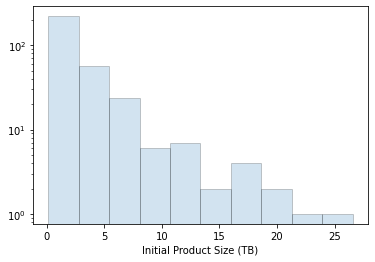

In [49]:
plt.hist(rpd[idx_mit]['initialprodsize']/1024,log=True,alpha=0.2,linestyle='-',edgecolor='black')
plt.xlabel('Initial Product Size (TB)')
#plt.hist(rpd[idx_mit]['mitigatedprodsize'],log=True,color='red',alpha=0.2)

Text(0, 0.5, 'Number of MOUSes')

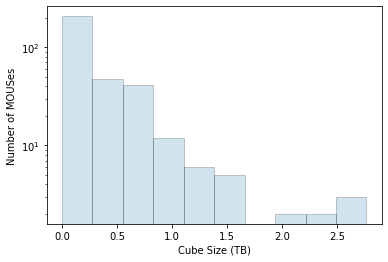

In [50]:
plt.hist(rpd[idx_mit]['predcubesize']/1024,log=True,alpha=0.2,linestyle='-',edgecolor='black')
plt.xlabel('Cube Size (TB)')
plt.ylabel('Number of MOUSes')

## making plots showing cube time as a function of total pipeline processing time

In [51]:
rpd.columns

Index(['project', 'plversion', 'procedure', 'nant', 'totaltime', 'imgtime',
       'cubetime', 'aggtime', 'fctime', 'nEB', 'npt', 'nscan', 'reptgt',
       'nscience', 'nspw', 'webpredrms', 'webcontrms', 'webcontBW', 'webfreq',
       'webbm', 'webdirtyDR', 'webDRcorr', 'webcontpk', 'webfreqline',
       'webbmline', 'webpredrmsline', 'webdirtyDRline', 'webDRcorrline',
       'weblinerms', 'weblinepk', 'weblineBW', 'allowedcubesize',
       'allowedcubelimit', 'predcubesize', 'mitigatedcubesize',
       'allowedprodsize', 'initialprodsize', 'prodsizeaftercube',
       'mitigatedprodsize', 'mitigated', 'mit_nbins', 'mit_hm_imsize',
       'mit_hm_cell', 'mit_field', 'mit_spw'],
      dtype='object')

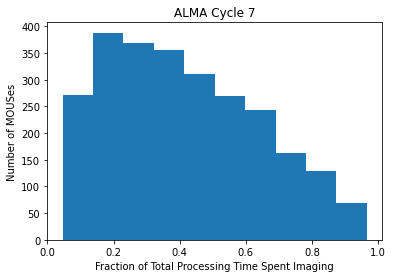

In [104]:
plt.hist(rpd['imgtime']/rpd['totaltime'])
plt.xlabel("Fraction of Total Processing Time Spent Imaging")
plt.ylabel("Number of MOUSes")
plt.title("ALMA Cycle 7")
plt.savefig("hist_fraction_of_processing_time_imaging.png")

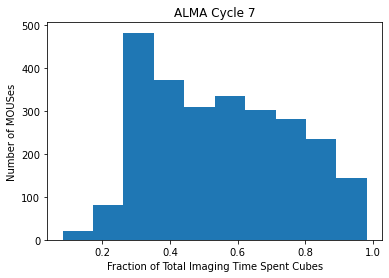

In [103]:
plt.hist(rpd['cubetime']/rpd['imgtime'])
plt.xlabel("Fraction of Total Imaging Time Spent Cubes")
plt.ylabel("Number of MOUSes")
plt.title("ALMA Cycle 7")
plt.savefig("hist_fraction_of_imaging_time_cubes.png")

(array([1.377e+03, 9.550e+02, 1.820e+02, 3.400e+01, 4.000e+00, 7.000e+00,
        1.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([0.0, 0.04676035492631299, 0.09352070985262598, 0.14028106477893898,
        0.18704141970525195, 0.23380177463156493, 0.28056212955787796,
        0.32732248448419093, 0.3740828394105039, 0.4208431943368169,
        0.4676035492631299], dtype=object),
 <BarContainer object of 10 artists>)

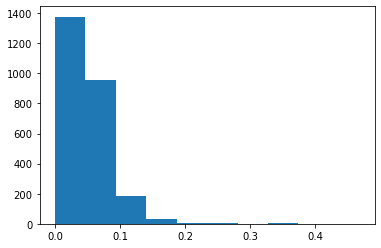

In [54]:
plt.hist(rpd['fctime']/rpd['totaltime'])

(array([0.2050682261208577, 0.41832358674463943, 0.554775828460039,
        0.6791423001949318, 0.7695906432748538, 0.853411306042885,
        0.9142300194931774, 0.9497076023391813, 0.9875243664717349, 1.0],
       dtype=object),
 array([0.01463021788734285, 0.10838767201955203, 0.2021451261517612,
        0.29590258028397043, 0.3896600344161796, 0.48341748854838873,
        0.577174942680598, 0.6709323968128071, 0.7646898509450163,
        0.8584473050772254, 0.9522047592094346], dtype=object),
 <BarContainer object of 10 artists>)

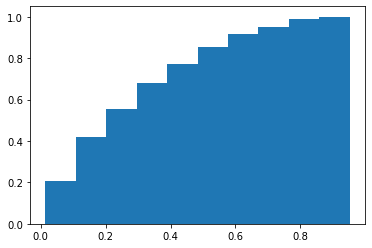

In [57]:
plt.hist((rpd['fctime']+rpd['cubetime'])/rpd['totaltime'],cumulative=True,density=True)

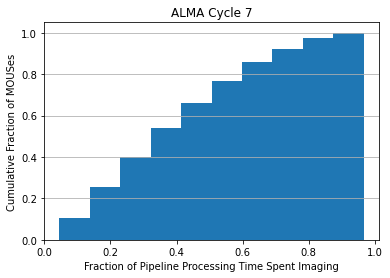

In [107]:
plt.hist((rpd['imgtime'])/rpd['totaltime'],cumulative=True,density=True)
plt.xlabel('Fraction of Pipeline Processing Time Spent Imaging')
plt.ylabel('Cumulative Fraction of MOUSes')
plt.title('ALMA Cycle 7')
plt.grid(axis='y')
plt.savefig('cumulative_dist_of_fraction_of_imaging.png')

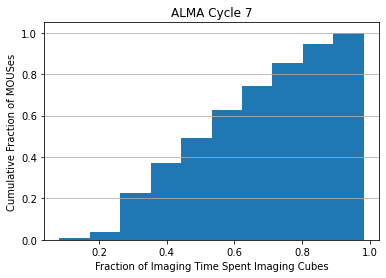

In [108]:
plt.hist((rpd['cubetime'])/rpd['imgtime'],cumulative=True,density=True)
plt.xlabel('Fraction of Imaging Time Spent Imaging Cubes')
plt.ylabel('Cumulative Fraction of MOUSes')
plt.title('ALMA Cycle 7')
plt.grid(axis='y')
plt.savefig('cumulative_dist_of_fraction_of_cubes.png')

In [77]:
rpd[['imgtime','cubetime','totaltime']]

,imgtime,cubetime,totaltime
uid___A001_X1465_X1002,4.113333,3.731667,5.119444
uid___A001_X1465_X1008,1.267778,0.985556,1.975556
uid___A001_X1465_X100e,1.510556,1.1925,2.331667
uid___A001_X1465_X1014,1.513611,1.216667,2.283889
uid___A001_X1465_X101a,1.357778,1.048056,2.155833
...,...,...,...
uid___A001_X15a3_X5,18.2525,10.916667,65.734444
uid___A001_X15a9_X134d,0.348611,0.056944,4.651944
uid___A001_X15a9_X1351,0.198333,0.028611,2.147222
uid___A001_X15aa_X74,0.507222,0.166944,4.363889


# can single field have both FOV and ppb mitigated?

In [13]:
idx = (rpd['npt'] == 1) & (rpd['mit_hm_imsize'] != 'default') & (rpd['mit_hm_cell'] != 'default')
rpd[idx][['npt','mit_hm_imsize','mit_hm_cell']]

,npt,mit_hm_imsize,mit_hm_cell
uid___A001_X1465_X121e,1,0.7pb,3ppb
uid___A001_X1465_X14f9,1,0.7pb,3ppb
uid___A001_X1465_X16f8,1,0.7pb,3ppb
uid___A001_X1465_X1839,1,0.7pb,3ppb
uid___A001_X1465_X183d,1,0.7pb,3ppb
uid___A001_X1465_X1841,1,0.7pb,3ppb
uid___A001_X1465_X1845,1,0.7pb,3ppb
uid___A001_X1465_X1849,1,0.7pb,3ppb
uid___A001_X1465_X184d,1,0.7pb,3ppb
uid___A001_X1465_X1851,1,0.7pb,3ppb


In [14]:
len(rpd[idx])

119